In [4]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [5]:
# cramer v test
def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)

# view max and min of a column and other stats
def desc(ds, colname):
    print(ds[colname].values[0:10])
    print(ds[colname].describe())


In [6]:
# load dataset
df = pd.read_csv('data/london_clean.csv')
len(df)

1286617

In [7]:
# compute chi square correlation, suitable for categorical values
# source: https://www.youtube.com/watch?v=_jdfjRzaHMM
tips_categorical = df[
    [
        'DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup', 
        'PropertyType', 'PumpHoursRoundUp', 'NumPumpsAttending', 
        'Notional Cost (£)', 'PropertyCategory', 'cloud_cover','sunshine',
        'global_radiation','max_temp','mean_temp','min_temp','precipitation',
        'pressure','snow_depth'
    ]
]

rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(
            tips_categorical[var1], tips_categorical[var2]
        )  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(
    cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns
)


In [8]:
df2

,DateOfCall,CalYear,HourOfCall,IncidentGroup,PropertyType,PumpHoursRoundUp,NumPumpsAttending,Notional Cost (£),PropertyCategory,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
DateOfCall,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.06,0.20,0.18,0.17,0.14,0.03,0.14,0.01
CalYear,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.01,0.04,0.09,0.09,0.08,0.07,0.03,0.13,0.01
HourOfCall,0.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
IncidentGroup,0.00,0.00,0.01,1.00,0.31,0.04,0.07,0.04,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PropertyType,0.00,0.00,0.00,0.31,1.00,0.00,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PumpHoursRoundUp,0.00,0.00,0.00,0.04,0.00,1.00,0.57,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NumPumpsAttending,0.00,0.00,0.00,0.07,0.01,0.57,1.00,0.71,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Notional Cost (£),0.01,0.50,0.00,0.04,0.00,0.99,0.71,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
PropertyCategory,0.00,0.00,0.00,0.22,1.00,0.00,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cloud_cover,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,1.00,0.16,0.13,0.10,0.08,0.07,0.03,0.23,0.00


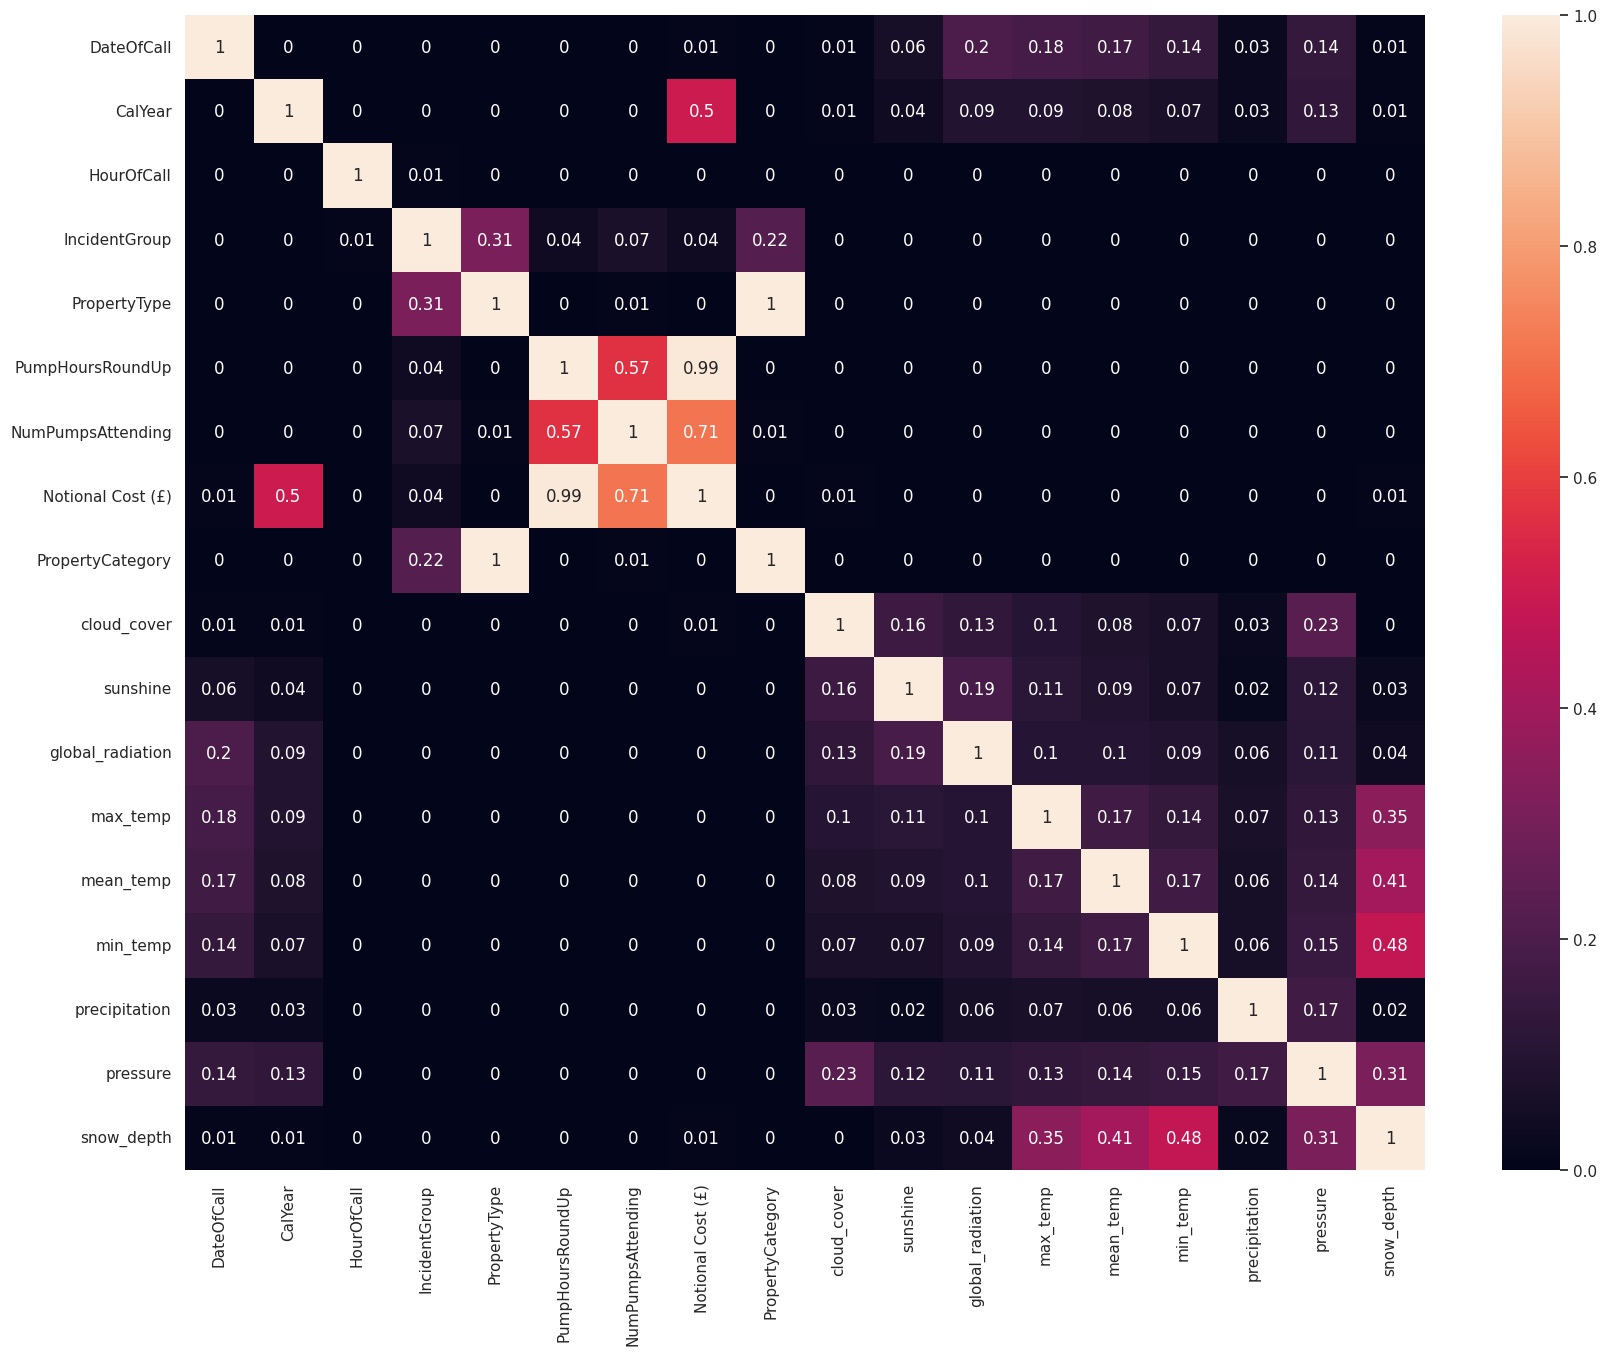

In [9]:
# plotting the heatmap
sns.set(rc={'figure.figsize':(20,15)})
hm = sns.heatmap(data=df2, annot=True)

# displaying the plotted heatmap
plt.show()